In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from bosonStar import *
from util import *

from ctypes import *
file = "./testing.so"
my_func = CDLL(file)

#Middle
massInCU = 2e-77
aInCU = 1e-73
totalMassInCU = 0.1
#dtInCU = 1000.0
#bigT = 100000
dtInCU = 1000.0
bigT = 1000

/home/kklee/anaconda3/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


A2=  -0.3197640202007044  X= 20.65212130424261
A2=  -0.4847073570464445  X= 20.0997201994404
A2=  -0.4996237064856289  X= 40.0
A2=  -0.5019378672755319  X= 16.740033480066963
A2=  -0.5018381151828868  X= 18.401316802633605
A2=  -0.5018730652697496  X= 15.347950695901392
A2=  -0.5019295973148135  X= 22.058364116728235
A2=  -0.5019295973148135  X= 22.058364116728235
MU= 0.3181619365115217 MASS= 0.09999012221832808
FAR POINT: 156400 500000


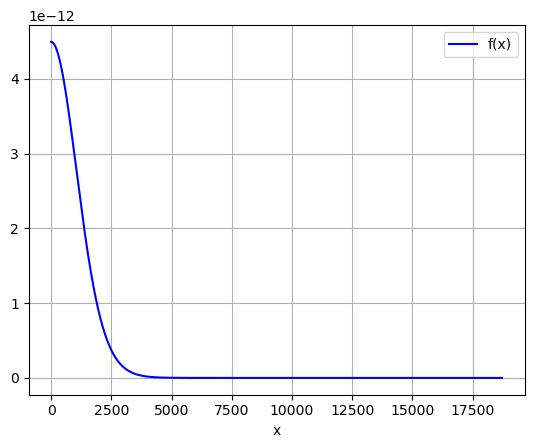

(1000,)


In [2]:
bosonStar = outputProfile(massInCU, aInCU, totalMassInCU, 500)
x = bosonStar["x"]
psi = bosonStar["profile"]

dx = x[1]-x[0]
for i in range(500):
    x = np.append(x, x[-1]+dx)
    psi = np.append(psi, psi[-1])

print(x.shape)

In [3]:
totalMass = massSIToPlanckUnit(massCodeUnitToSI(totalMassInCU))
m = massSIToPlanckUnit(massCodeUnitToSI(massInCU))
a = lengthSIToPlanckUnit(lengthCodeUnitToSI(aInCU))
N = totalMass/m
Ra = np.sqrt(a/m/m/m)
omegaA = m*m/np.abs(a)
epsilon = 1.0/omegaA/m/Ra/Ra
a0 = np.sqrt(1.0/omegaA/m)
delta = 4.0*np.pi*a*N/a0
GM = totalMass/Ra/Ra/Ra/omegaA/omegaA

print("R:", Ra)
print("Omega:" ,omegaA)
print("Epsilon (Should be 1):", epsilon)
print("Delta:", delta)
print("New G:", GM)

R: 3.8684718785837514e+40
Omega: 3.656129092998465e-43
Epsilon (Should be 1): 1.0000000000000002
Delta: 14.839459489461666
New G: 1.180886665279879


In [4]:
x = lengthSIToPlanckUnit(lengthCodeUnitToSI(x))/Ra
psi = np.sqrt(densitySIToPlanckUnit(densityCodeUnitToSI(psi))/totalMass)*np.power(Ra, 3.0/2.0)
normalization = scipy.integrate.simpson(4.0*np.pi*x*x*np.absolute(psi)*np.absolute(psi), x=x)
psi = psi/normalization
psi = psi.astype(complex)

size = len(psi)
dt = timeSIToPlanckUnit(timeCodeUnitToSI(dtInCU))*omegaA
dx = x[1]-x[0]

print(psi)
print("DT:", dt)
print("DX:", dx)

[5.83973278e-02+0.j 5.83608193e-02+0.j 5.82878809e-02+0.j
 5.81786701e-02+0.j 5.80334220e-02+0.j 5.78524489e-02+0.j
 5.76361390e-02+0.j 5.73849547e-02+0.j 5.70994308e-02+0.j
 5.67801731e-02+0.j 5.64278553e-02+0.j 5.60432170e-02+0.j
 5.56270607e-02+0.j 5.51802488e-02+0.j 5.47037006e-02+0.j
 5.41983885e-02+0.j 5.36653348e-02+0.j 5.31056077e-02+0.j
 5.25203178e-02+0.j 5.19106136e-02+0.j 5.12776778e-02+0.j
 5.06227230e-02+0.j 4.99469874e-02+0.j 4.92517308e-02+0.j
 4.85382301e-02+0.j 4.78077752e-02+0.j 4.70616646e-02+0.j
 4.63012016e-02+0.j 4.55276897e-02+0.j 4.47424291e-02+0.j
 4.39467125e-02+0.j 4.31418217e-02+0.j 4.23290234e-02+0.j
 4.15095664e-02+0.j 4.06846779e-02+0.j 3.98555608e-02+0.j
 3.90233903e-02+0.j 3.81893119e-02+0.j 3.73544384e-02+0.j
 3.65198479e-02+0.j 3.56865817e-02+0.j 3.48556428e-02+0.j
 3.40279940e-02+0.j 3.32045567e-02+0.j 3.23862100e-02+0.j
 3.15737893e-02+0.j 3.07680864e-02+0.j 2.99698484e-02+0.j
 2.91797778e-02+0.j 2.83985321e-02+0.j 2.76267244e-02+0.j
 2.68649234e-0

In [5]:
T = np.zeros((size,size)).astype(complex)
TSph = np.zeros((size,size)).astype(complex)
Q = np.zeros((size,size)).astype(complex)
V2Grav = np.zeros((size,size)).astype(complex)
I = np.identity(size).astype(complex)
phi = np.zeros((size))

In [6]:
def setupT():
    global T, TSph
    for i in range(size):
        if i==0:
            #T[i][i] = -3.0
            #T[i][i+1] = 3.0
            T[i][i] = (4.0/3.0-5.0/2.0)*3
            T[i][i+1] = (4.0/3.0-1.0/12.0)*3
            T[i][i+2] = (-1.0/12.0)*3
        elif i==1:
            T[i][i-1] = (-1.0/12.0+4.0/3.0)*3
            T[i][i] = (-5.0/2.0)*3
            T[i][i+1] = (4.0/3.0)*3
            T[i][i+2] = (-1.0/12.0)*3
        elif i==size-1:
            #T[i][i] = -1.0
            #T[i][i-1] = 1.0
            T[i][i-2] = -1.0/12.0
            T[i][i-1] = 4.0/3.0
            T[i][i] = -5.0/2.0+4.0/3.0-1.0/12.0
            TSph[i][i-1] = -1.0/2.0/x[i]
            TSph[i][i] = 1.0/2.0/x[i]
        elif i==size-2:
            T[i][i-2] = -1.0/12.0
            T[i][i-1] = 4.0/3.0
            T[i][i] = -5.0/2.0
            T[i][i+1] = 4.0/3.0-1.0/12.0
            TSph[i][i+1] = 1.0/2.0/x[i]
            TSph[i][i-1] = -1.0/2.0/x[i]
        else:
            T[i][i-2] = -1.0/12.0
            T[i][i-1] = 4.0/3.0
            T[i][i] = -5.0/2.0
            T[i][i+1] = 4.0/3.0
            T[i][i+2] = -1.0/12.0
            #T[i][i] = -2.0
            #T[i][i+1] = 1.0
            #T[i][i-1] = 1.0
            TSph[i][i+1] = 1.0/2.0/x[i]
            TSph[i][i-1] = -1.0/2.0/x[i]

    T = -1.0/2.0/dx/dx*T
    TSph = -1.0/dx*TSph

def setupQ():
    global Q
    for i in range(size):
        Q[i][i] = delta*np.absolute(psi[i])*np.absolute(psi[i])

def setupV2Grav():
    global V2Grav, phi, psi

    rho = np.absolute(psi)*np.absolute(psi)
    rho_c = (c_double * size)(*rho)
    phi_c = (c_double * size)(*np.absolute(phi))
    my_func.findGravRho(rho_c, phi_c, c_int(size), c_double(dx))
    for i in range(size):
        phi[i] = phi_c[i] * GM

    for i in range(size):
        V2Grav[i][i] = phi[i]

def setupU1U2():
    global U1, U2
    U1 = I + 1.0j*dt/2.0*(T+TSph+Q+V2Grav)
    U2 = I - 1.0j*dt/2.0*(T+TSph+Q+V2Grav)

0 0.0 0.05839751001535221 1.0001279759211006


/tmp/ipykernel_99236/3173652264.py:55: RuntimeWarning: divide by zero encountered in divide
  quantumPotential = -hBarCU*hBarCU/2.0/massInCU*(d2Rhodx + 2.0/(x*Ra*1.616e-35*100*6.77193e-6)*dRhodx)/np.sqrt(rhoTemp)
/tmp/ipykernel_99236/3173652264.py:55: RuntimeWarning: invalid value encountered in divide
  quantumPotential = -hBarCU*hBarCU/2.0/massInCU*(d2Rhodx + 2.0/(x*Ra*1.616e-35*100*6.77193e-6)*dRhodx)/np.sqrt(rhoTemp)
/tmp/ipykernel_99236/3173652264.py:57: RuntimeWarning: invalid value encountered in divide
  plt.plot(x*Ra*1.616e-35*100*6.77193e-6, pressureGradients/rhoTemp)
/home/kklee/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:1250: RuntimeWarning: invalid value encountered in multiply
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


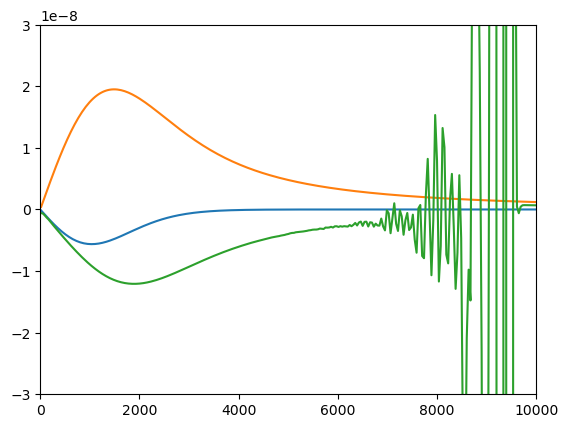

1 0.033404108551634115 0.05839804233826014 1.0001279747575975
2 0.06680821710326823 0.058398856479397625 1.0001279733853357
3 0.10021232565490235 0.05840001558823548 1.0001279711385527
4 0.13361643420653646 0.0584014988690343 1.0001279683635727
5 0.16702054275817058 0.0584033139499079 1.0001279650492092
6 0.2004246513098047 0.05840545305263637 1.000127960896526
7 0.2338287598614388 0.05840792355098219 1.0001279564613588
8 0.2672328684130729 0.058410719049900146 1.00012795101469
9 0.30063697696470704 0.0584138409932348 1.000127945362525
10 0.33404108551634115 0.058417290772447124 1.0001279387261208
11 0.36744519406797527 0.05842106055844011 1.000127931766866
12 0.4008493026196094 0.058425161244054315 1.0001279240174399
13 0.4342534111712435 0.05842957533470312 1.0001279157079472
14 0.4676575197228776 0.05843432248355901 1.0001279068636624
15 0.5010616282745117 0.05843937691714374 1.0001278972260266
16 0.5344657368261458 0.05844476512711806 1.0001278872431807
17 0.56786984537778 0.058450

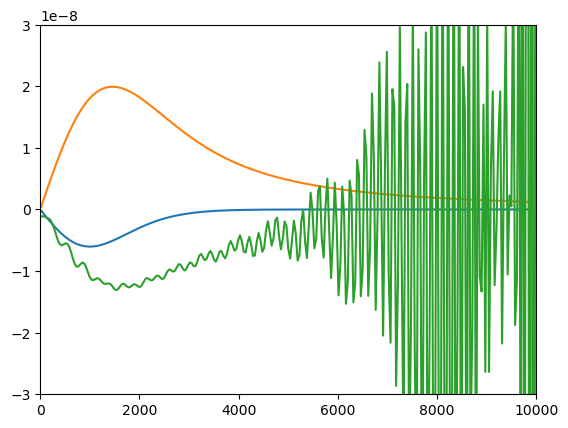

101 3.373814963715046 0.05983753618888087 1.000125039793155
102 3.4072190722666797 0.059862672471778504 1.0001249865676516
103 3.4406231808183136 0.05989121675362703 1.0001249322676389
104 3.474027289369948 0.05992049982079787 1.0001248775442306
105 3.5074313979215823 0.0599453902684082 1.00012482282959
106 3.540835506473216 0.05996341575356827 1.0001247693755098
107 3.57423961502485 0.05997951604483784 1.000124715761949
108 3.6076437235764844 0.06000300792268672 1.0001246609919316
109 3.6410478321281188 0.06003768799656578 1.0001246035443376
110 3.6744519406797527 0.060075533662875165 1.0001245453213037
111 3.7078560492313866 0.0601042724433982 1.0001244883439102
112 3.741260157783021 0.06012156717926567 1.000124433187186
113 3.7746642663346552 0.0601376185832641 1.000124377807669
114 3.808068374886289 0.060161262297078744 1.0001243201882233
115 3.841472483437923 0.06018929830163005 1.0001242617527581
116 3.8748765919895574 0.06021468722993084 1.0001242037487763
117 3.9082807005411917

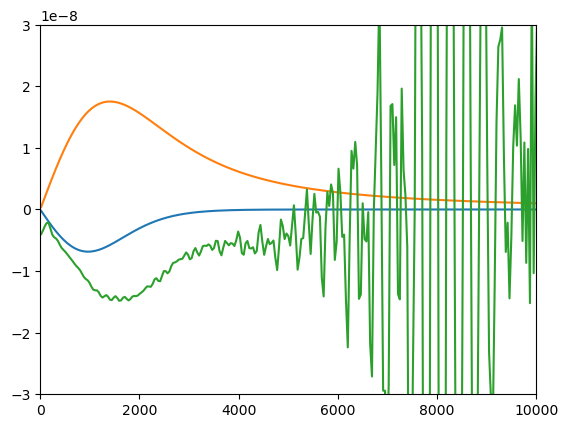

201 6.714225818878457 0.06260807195853146 1.0001185285537686
202 6.747629927430092 0.0626304939178454 1.0001184676290866
203 6.781034035981725 0.06265039484235589 1.0001184083105015
204 6.8144381445333595 0.06266913830465395 1.000118349702835
205 6.847842253084994 0.06269021150641142 1.0001182907577728
206 6.881246361636627 0.06270877297907503 1.0001182331115481
207 6.914650470188262 0.06272674551490662 1.0001181763970426
208 6.948054578739896 0.06274698986840185 1.0001181190265993
209 6.98145868729153 0.06276473361470637 1.000118063335449
210 7.014862795843165 0.06278245502484335 1.0001180081632615
211 7.048266904394798 0.06280228011873056 1.000117952504785
212 7.081671012946432 0.06281956154841108 1.0001178986844212
213 7.115075121498067 0.06283740235273927 1.0001178448801011
214 7.1484792300497 0.06285695612553492 1.00011779119119
215 7.1818833386013345 0.0628739933130226 1.0001177388121125
216 7.215287447152969 0.062892034581818 1.0001176868419788
217 7.248691555704603 0.0629113014

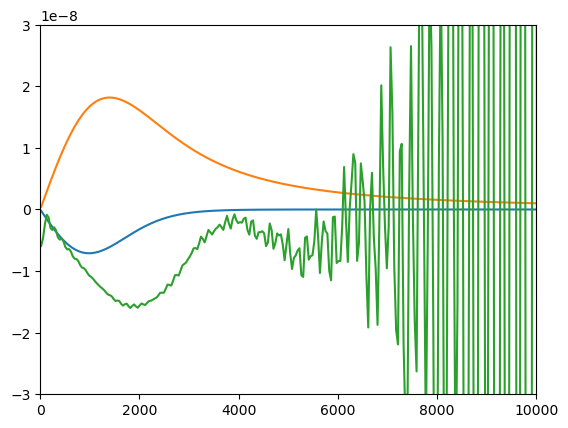

301 10.054636674041868 0.06362054085834487 1.0001151426149137
302 10.088040782593502 0.06362281373956274 1.0001151308843923
303 10.121444891145137 0.06362428773787121 1.000115119758828
304 10.154848999696771 0.06362521427636485 1.0001151093311111
305 10.188253108248405 0.06362724030420813 1.0001150984127005
306 10.22165721680004 0.0636278309580279 1.0001150887211205
307 10.255061325351674 0.06362896287846766 1.0001150788070043
308 10.288465433903308 0.06363036761346297 1.0001150691962954
309 10.321869542454941 0.06363049560883306 1.0001150603988052
310 10.355273651006575 0.06363184431088774 1.0001150512706776
311 10.38867775955821 0.0636324103917708 1.000115042866051
312 10.422081868109844 0.06363260786041443 1.0001150347877732
313 10.455485976661478 0.0636338553048002 1.0001150266177457
314 10.488890085213113 0.06363372726481371 1.000115019209313
315 10.522294193764747 0.06363433380089506 1.0001150118945836
316 10.55569830231638 0.06363505427542394 1.0001150046067486
317 10.5891024108

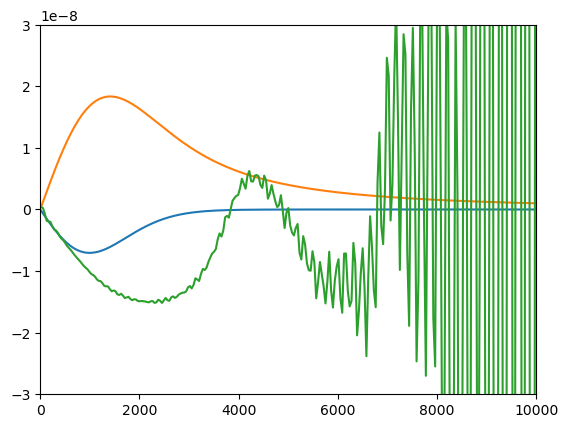

401 13.39504752920528 0.06361278165988692 1.0001151789272935
402 13.428451637756915 0.06361038351124301 1.0001151881400534
403 13.461855746308549 0.06360878970317316 1.0001151972623572
404 13.495259854860183 0.06360660036088048 1.0001152064831542
405 13.528663963411816 0.06360440304411889 1.000115216163436
406 13.56206807196345 0.06360267635831085 1.0001152253177672
407 13.595472180515085 0.06360007475168096 1.0001152353781306
408 13.628876289066719 0.06359826625718701 1.0001152448196218
409 13.662280397618353 0.06359594182047765 1.0001152548337042
410 13.695684506169988 0.06359353451856166 1.0001152648763902
411 13.729088614721622 0.06359165126390871 1.0001152747291497
412 13.762492723273255 0.0635889164181408 1.000115285228896
413 13.795896831824889 0.06358690518423162 1.000115295238933
414 13.829300940376523 0.06358449498522056 1.0001153058041123
415 13.862705048928158 0.06358190661266404 1.0001153162607015
416 13.896109157479792 0.06357990902936807 1.0001153267775675
417 13.9295132

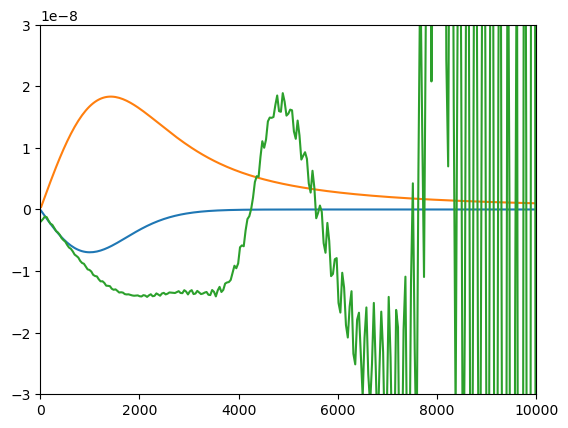

501 16.73545838436869 0.06337365061766219 1.0001164457404368
502 16.768862492920327 0.06337115729045398 1.0001164607105906
503 16.80226660147196 0.06336916179111149 1.0001164750993612
504 16.835670710023592 0.06336652356053736 1.0001164902870547
505 16.86907481857523 0.06336443474536205 1.0001165047204426
506 16.90247892712686 0.0633620451836199 1.0001165198074966
507 16.935883035678497 0.06335958140886652 1.000116534553589
508 16.96928714423013 0.06335751240685755 1.000116549384734
509 17.002691252781766 0.06335482599980632 1.0001165644570758
510 17.0360953613334 0.06335274711973893 1.000116579141998
511 17.069499469885034 0.06335023013553555 1.000116594357496
512 17.102903578436667 0.06334780988698141 1.0001166090903553
513 17.1363076869883 0.06334562009792308 1.0001166242958974
514 17.169711795539936 0.06334291706749232 1.000116639155003
515 17.203115904091568 0.06334079566263873 1.0001166543503093
516 17.236520012643204 0.06333817612993285 1.0001166692852002
517 17.269924121194837 

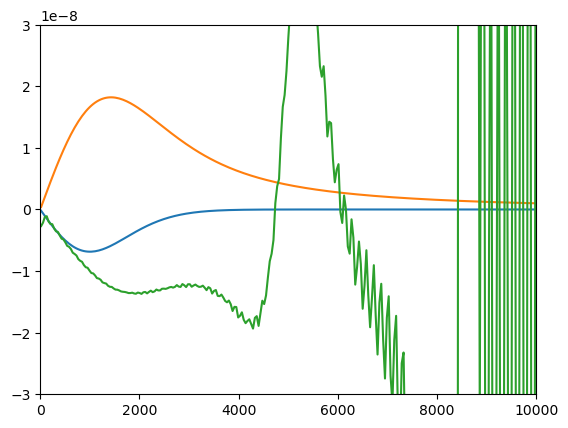

601 20.075869239532103 0.06306725126406446 1.0001180342691607
602 20.109273348083736 0.06306323677450261 1.000118050865966
603 20.142677456635372 0.06305936261908829 1.0001180680186814
604 20.176081565187005 0.06305511158509651 1.0001180848135678
605 20.20948567373864 0.06305130937898933 1.0001181017932057
606 20.242889782290273 0.06304704985853354 1.0001181188204733
607 20.27629389084191 0.0630430707762845 1.0001181356540594
608 20.309697999393542 0.06303900497061152 1.0001181528397844
609 20.343102107945175 0.06303475151936468 1.0001181696131305
610 20.37650621649681 0.06303084826147043 1.0001181868740037
611 20.409910325048443 0.0630264726283147 1.0001182036608665
612 20.44331443360008 0.0630225042652144 1.000118220923291
613 20.476718542151712 0.06301824801577037 1.0001182378012483
614 20.510122650703348 0.06301402824149528 1.0001182549796952
615 20.54352675925498 0.06300997370180778 1.0001182720356068
616 20.576930867806617 0.06300554807970486 1.0001182890462352
617 20.61033497635

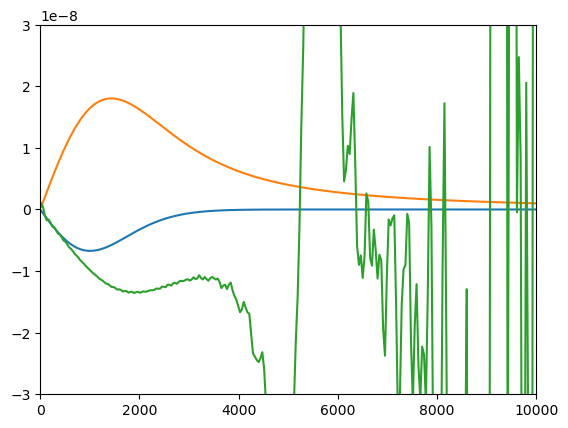

701 23.416280094695516 0.06260755806460393 1.0001197660397125
702 23.44968420324715 0.06260232142506177 1.0001197833542206
703 23.483088311798785 0.06259743512296861 1.0001198012275214
704 23.516492420350417 0.06259227419506858 1.0001198180832325
705 23.54989652890205 0.06258722260007384 1.0001198362876378
706 23.583300637453686 0.06258222325721886 1.0001198529881903
707 23.61670474600532 0.06257700137780854 1.0001198711366106
708 23.650108854556954 0.06257208627552878 1.0001198880989879
709 23.683512963108587 0.06256683367647908 1.0001199057951629
710 23.716917071660223 0.06256183808490695 1.0001199233349585
711 23.750321180211856 0.06255670742329683 1.0001199403968581
712 23.783725288763492 0.06255152954964244 1.0001199585273204
713 23.817129397315124 0.06254654202512813 1.0001199751196186
714 23.850533505866757 0.06254123659004329 1.000119993519875
715 23.883937614418393 0.06253627139998812 1.0001200100794791
716 23.917341722970026 0.06253100764509291 1.0001200282501213
717 23.95074

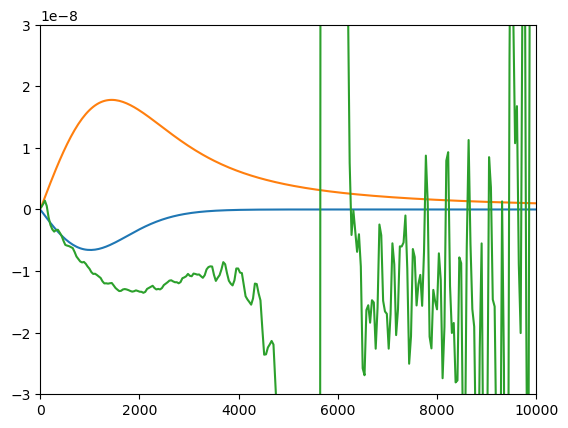

801 26.756690949858925 0.06206746691761922 1.0001215080306087
802 26.79009505841056 0.06206478692330667 1.0001215268310806
803 26.823499166962193 0.062058726164452835 1.0001215425220529
804 26.85690327551383 0.062049267539246125 1.000121562144735
805 26.890307384065462 0.06204090162109987 1.000121579124264
806 26.923711492617098 0.06203479738535031 1.0001215966412687
807 26.95711560116873 0.0620292668464797 1.0001216144793175
808 26.990519709720367 0.06202257958124534 1.0001216310623573
809 27.023923818272 0.06201704225404847 1.000121650351347
810 27.057327926823632 0.062014414166602506 1.0001216652802127
811 27.090732035375268 0.06201154539880493 1.0001216842314127
812 27.1241361439269 0.06200542617552972 1.0001216999944
813 27.157540252478537 0.06199652930461139 1.0001217194944778
814 27.19094436103017 0.061988879665362595 1.0001217364645334
815 27.224348469581805 0.06198277110828611 1.000121753780142
816 27.257752578133438 0.06197572178504327 1.0001217721687055
817 27.29115668668507

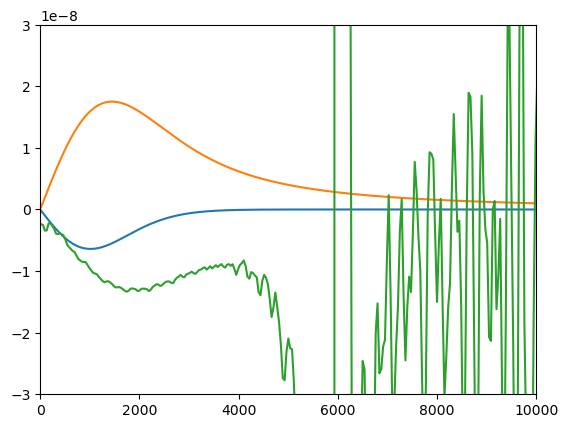

901 30.097101805022337 0.06143179060101951 1.0001232876735107
902 30.130505913573973 0.0614225128497406 1.000123304415074
903 30.163910022125606 0.06141472742446718 1.000123323631746
904 30.197314130677242 0.06140774905296776 1.0001233418938669
905 30.230718239228874 0.061398791930868 1.0001233591224035
906 30.264122347780507 0.061389971973208515 1.0001233802153398
907 30.297526456332143 0.061383613450291225 1.0001233951983053
908 30.330930564883776 0.06137831805752995 1.0001234165405268
909 30.364334673435412 0.06137124226996496 1.0001234317262282
910 30.397738781987044 0.06136462172507384 1.000123452997187
911 30.43114289053868 0.061360105471520446 1.000123468869616
912 30.464546999090313 0.06135453723596277 1.0001234878086762
913 30.497951107641946 0.06134665180790732 1.0001235068561638
914 30.53135521619358 0.06133875355386638 1.0001235238790052
915 30.564759324745214 0.06133230973686708 1.0001235444707144
916 30.59816343329685 0.06132404676372112 1.000123559775261
917 30.631567541

In [7]:
setupT()
setupQ()
setupV2Grav()
setupU1U2()

hello = []
hello2 = []
ts = []
oldGM = GM
newGM = GM*1.2
for t in range(bigT):
    #Pertubation
    if(t*dt<6.0):
        GM = newGM
    if(t*dt>=6.0):
        GM = oldGM

    setupT()
    setupQ()
    setupV2Grav()
    setupU1U2()
    psi = np.linalg.solve(U2, np.dot(U1,psi))

    normalization = scipy.integrate.simpson(4.0*np.pi*x*x*np.absolute(psi)*np.absolute(psi), x=x)
    #if(normalization >= 1.01):
    #    break
    print(t, t*dt, np.absolute(psi[0]), normalization)
    if(GM == oldGM):

        def findMass():
            for i in range(size):
                if(i != 0):
                    temp = scipy.integrate.simpson(4.0*np.pi*x[:i]*x[:i]*np.absolute(psi[:i])*np.absolute(psi[:i]), x=x[:i])
                    if(temp > 0.99):
                        return i
            return size-1
            
        hello2.append(findMass())

        hello.append(np.absolute(psi[0])*np.absolute(psi[0]))
        ts.append(t*dt)

    if t%100 == 0:
        hBarInCU = 1.1977151493389159e-76
        setupV2Grav()
        np.set_printoptions(threshold=np.inf)

        rhoTemp = np.absolute(psi)*np.absolute(psi)/Ra/Ra/Ra*totalMass*5.1550e96*0.001*1.619e-18
        pressure = 2.0*np.pi*aInCU*hBarInCU*hBarInCU/massInCU/massInCU/massInCU*rhoTemp*rhoTemp
        pressureGradients = np.gradient(pressure, x*Ra*1.616e-35*100*6.77193e-6, edge_order=2)
        gravitationalPotential = phi*Ra*Ra*omegaA*omegaA*1.616e-35*100*6.77193e-6*1.616e-35*100*6.77193e-6/5.391e-44/5.391e-44/2.03017e5/2.03017e5

        dRhodx = np.gradient(np.sqrt(rhoTemp), x*Ra*1.616e-35*100*6.77193e-6, edge_order=2)
        d2Rhodx = np.gradient(dRhodx, x*Ra*1.616e-35*100*6.77193e-6, edge_order=2)
        quantumPotential = -hBarCU*hBarCU/2.0/massInCU*(d2Rhodx + 2.0/(x*Ra*1.616e-35*100*6.77193e-6)*dRhodx)/np.sqrt(rhoTemp)

        plt.plot(x*Ra*1.616e-35*100*6.77193e-6, pressureGradients/rhoTemp)
        plt.plot(x*Ra*1.616e-35*100*6.77193e-6, np.gradient(gravitationalPotential, x*Ra*1.616e-35*100*6.77193e-6, edge_order=2))
        plt.plot(x*Ra*1.616e-35*100*6.77193e-6, np.gradient(quantumPotential, x*Ra*1.616e-35*100*6.77193e-6)/massInCU)

        plt.xlim(0.0,10000.0)
        plt.ylim(-3e-8,3e-8)
        #print(np.gradient(quantumPotential[100:1500], x[100:1500]*Ra*1.616e-35*100*6.77193e-6)/massInCU)
        #print(x[100]*Ra*1.616e-35*100*6.77193e-6)
        plt.show()

        #plt.plot(x, np.absolute(psi)*np.absolute(psi))

#plt.xlabel(r"$r$ (dimensionless)")
#plt.ylabel(r"$\left | \psi^2 \right |$ (dimensionless)")
#plt.show()

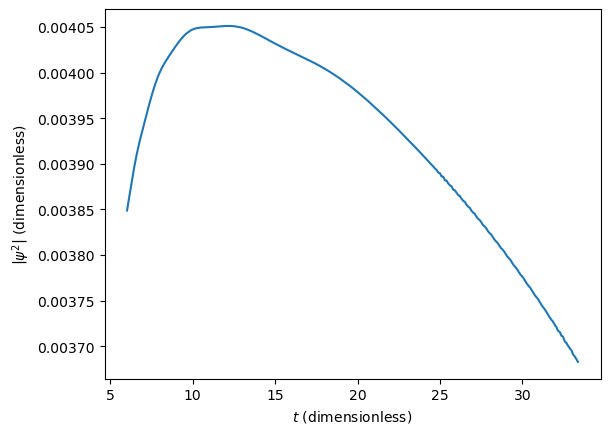

In [8]:
plt.plot(ts[:30000], hello[:30000])
plt.xlabel(r"$t$ (dimensionless)")
plt.ylabel(r"$\left | \psi^2 \right |$ (dimensionless)")
plt.show()

Text(0.5, 0, 'f (1/s)')

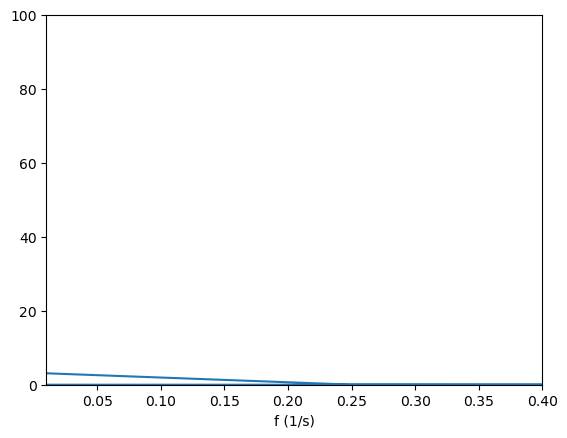

In [9]:
sp = np.fft.fft(hello)
freq = np.fft.fftfreq(len(hello), d=dt)*omegaA/5.391247e-44

plt.plot(freq, np.absolute(sp))
plt.xlim(0.01,0.4)
plt.ylim(0.0,100.0)
plt.xlabel("f (1/s)")

In [10]:
print(freq[1]-freq[0])
for i in range(len(freq)-1):
    if(freq[i] > 0.0 and np.absolute(sp[i]) > 0.04 and np.absolute(sp[i])>np.absolute(sp[i+1]) and np.absolute(sp[i])>np.absolute(sp[i-1])):
        print(freq[i], np.absolute(sp[i]))

0.2475817073170731


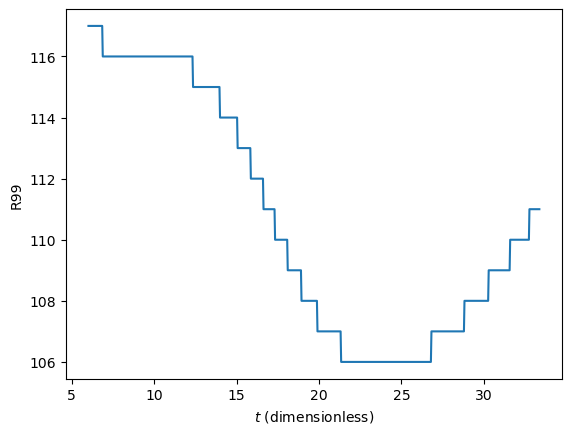

In [11]:
plt.plot(ts, hello2)
plt.xlabel(r"$t$ (dimensionless)")
plt.ylabel(r"R99")
plt.show()

Text(0.5, 0, 'f (1/s)')

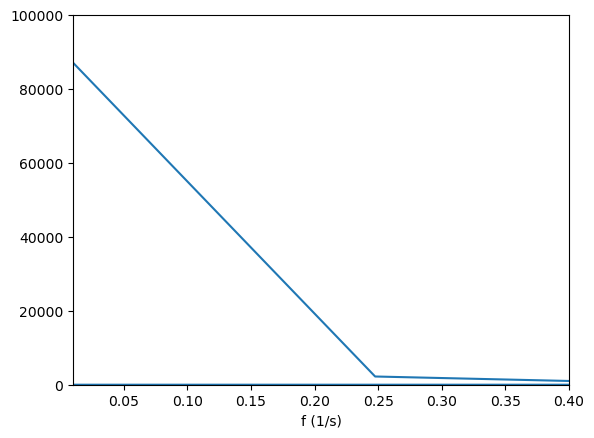

In [12]:
sp = np.fft.fft(hello2)
freq = np.fft.fftfreq(len(hello2), d=dt)*omegaA/5.391247e-44

plt.plot(freq, np.absolute(sp))
plt.xlim(0.01,0.4)
plt.ylim(0.0,100000)
plt.xlabel("f (1/s)")

In [13]:
print(freq[1]-freq[0])
for i in range(len(freq)-1):
    if(freq[i] > 0.0 and np.absolute(sp[i]) > 5000 and np.absolute(sp[i])>np.absolute(sp[i+1]) and np.absolute(sp[i])>np.absolute(sp[i-1])):
        print(freq[i], np.absolute(sp[i]))

0.2475817073170731


[6.06862015e-02 6.06469791e-02 6.05686385e-02 6.04514714e-02
 6.02951777e-02 6.01000675e-02 5.98663220e-02 5.95943719e-02
 5.92852903e-02 5.89399355e-02 5.85591696e-02 5.81439163e-02
 5.76947828e-02 5.72126668e-02 5.66986871e-02 5.61538282e-02
 5.55792973e-02 5.49762043e-02 5.43455405e-02 5.36886566e-02
 5.30069045e-02 5.23016949e-02 5.15746355e-02 5.08270690e-02
 5.00603546e-02 4.92759497e-02 4.84751207e-02 4.76592914e-02
 4.68299115e-02 4.59882999e-02 4.51359875e-02 4.42744652e-02
 4.34051151e-02 4.25293963e-02 4.16485538e-02 4.07637742e-02
 3.98763650e-02 3.89875399e-02 3.80985715e-02 3.72107169e-02
 3.63250464e-02 3.54426292e-02 3.45644905e-02 3.36916078e-02
 3.28249749e-02 3.19654951e-02 3.11139800e-02 3.02711660e-02
 2.94377556e-02 2.86144366e-02 2.78018514e-02 2.70006548e-02
 2.62114157e-02 2.54346203e-02 2.46707725e-02 2.39202239e-02
 2.31832832e-02 2.24602708e-02 2.17513631e-02 2.10568202e-02
 2.03769047e-02 1.97117555e-02 1.90615595e-02 1.84263780e-02
 1.78061846e-02 1.720101

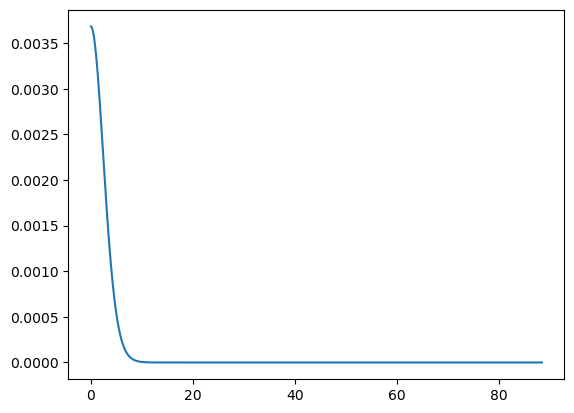

In [14]:
plt.plot(x, np.absolute(psi)*np.absolute(psi))
print(np.absolute(psi))

Middle
0.071-0.081			M1 (M2: 0.142-0.162, M3: 0.213-0.243, M4: 0.284-0.324, M5: 0.355-0.405)
0.132-0.137			M1?
0.158-0.163			M2
0.193-0.204			M1?
0.239-0.249			M3
0.295-0.305			M4
0.361-0.371			M5

0.076-0.086			M1
0.132-0.142			M1?
0.158-0.168			M2

Small
0.097-0.107		M1
0.163-0.173		M1?
0.214-0.224		M2
0.270-0.280		M1?
0.341-0.351		M3
0.432-0.443		M4
0.534-0.544		M5
0.651-0.661		M6

Heavy
0.031-0.037		M1
0.058-0.065		M2
0.072-0.078		M?
0.082-0.089		M?
0.099-0.167 	M3
0.116-0.123		M4
0.140-0.147		M5
0.167-0.173		M6?
0.194-0.201 	M7?